# <회귀분석>
- 회귀분석은 실제값과 예측값의 차이를 기반으로 한 지표들을 중심으로 성능 평가

### MAE
- 실제값과 예측값의 차이를 절댓값으로 반환하여 평균으로 구한 데이터
- 에러의 크기가 그대로 반영
- 이상치의 데이터가 존재하면 영향을 크게 받음

### MSE
- 실제값과 예측값의 차이를 제곱해서 평균으로 구한 데이터
- 실제값과 예측값의 면적의 합을 의미
- 특이값이 존재하면 수치 증가

### RMSE
- MSE 값에서 루트를 사용한 데이터
- 에러에 제곱을 에러가 클수록 그에 따른 가중치가 높이 반영
- 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 더 커지는 것을 상쇄하기 위해 사용

### MSLE
- MSE 값에 로그를 사용한 데이터
- RMSE와 같이 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 더 커지는 것을 상쇄하기 위해 사용

### MAPE
- MAE를 퍼센트로 표시
- 오타가 예측값에서 차지하는 정도를 나타냄


In [279]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [280]:
california_data = fetch_california_housing()

In [281]:
california_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [282]:
california_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [283]:
df = pd.DataFrame(california_data['data'], columns=california_data['feature_names'])

In [284]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [285]:
california_data['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [286]:
california_data['target_names']

['MedHouseVal']

In [287]:
df['value'] = california_data['target']

In [288]:
# 데이터프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   value       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [289]:
# 결측치의 개수 확인
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
value         0
dtype: int64

- 0~8 컬럼은 독립변수
- 9 value 컬럼은 종속변수
- 각 독립변수가 종속변수에 끼치는 영향 구하려면 8개의 그래프 확인

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns

In [291]:
len(df.columns)

9

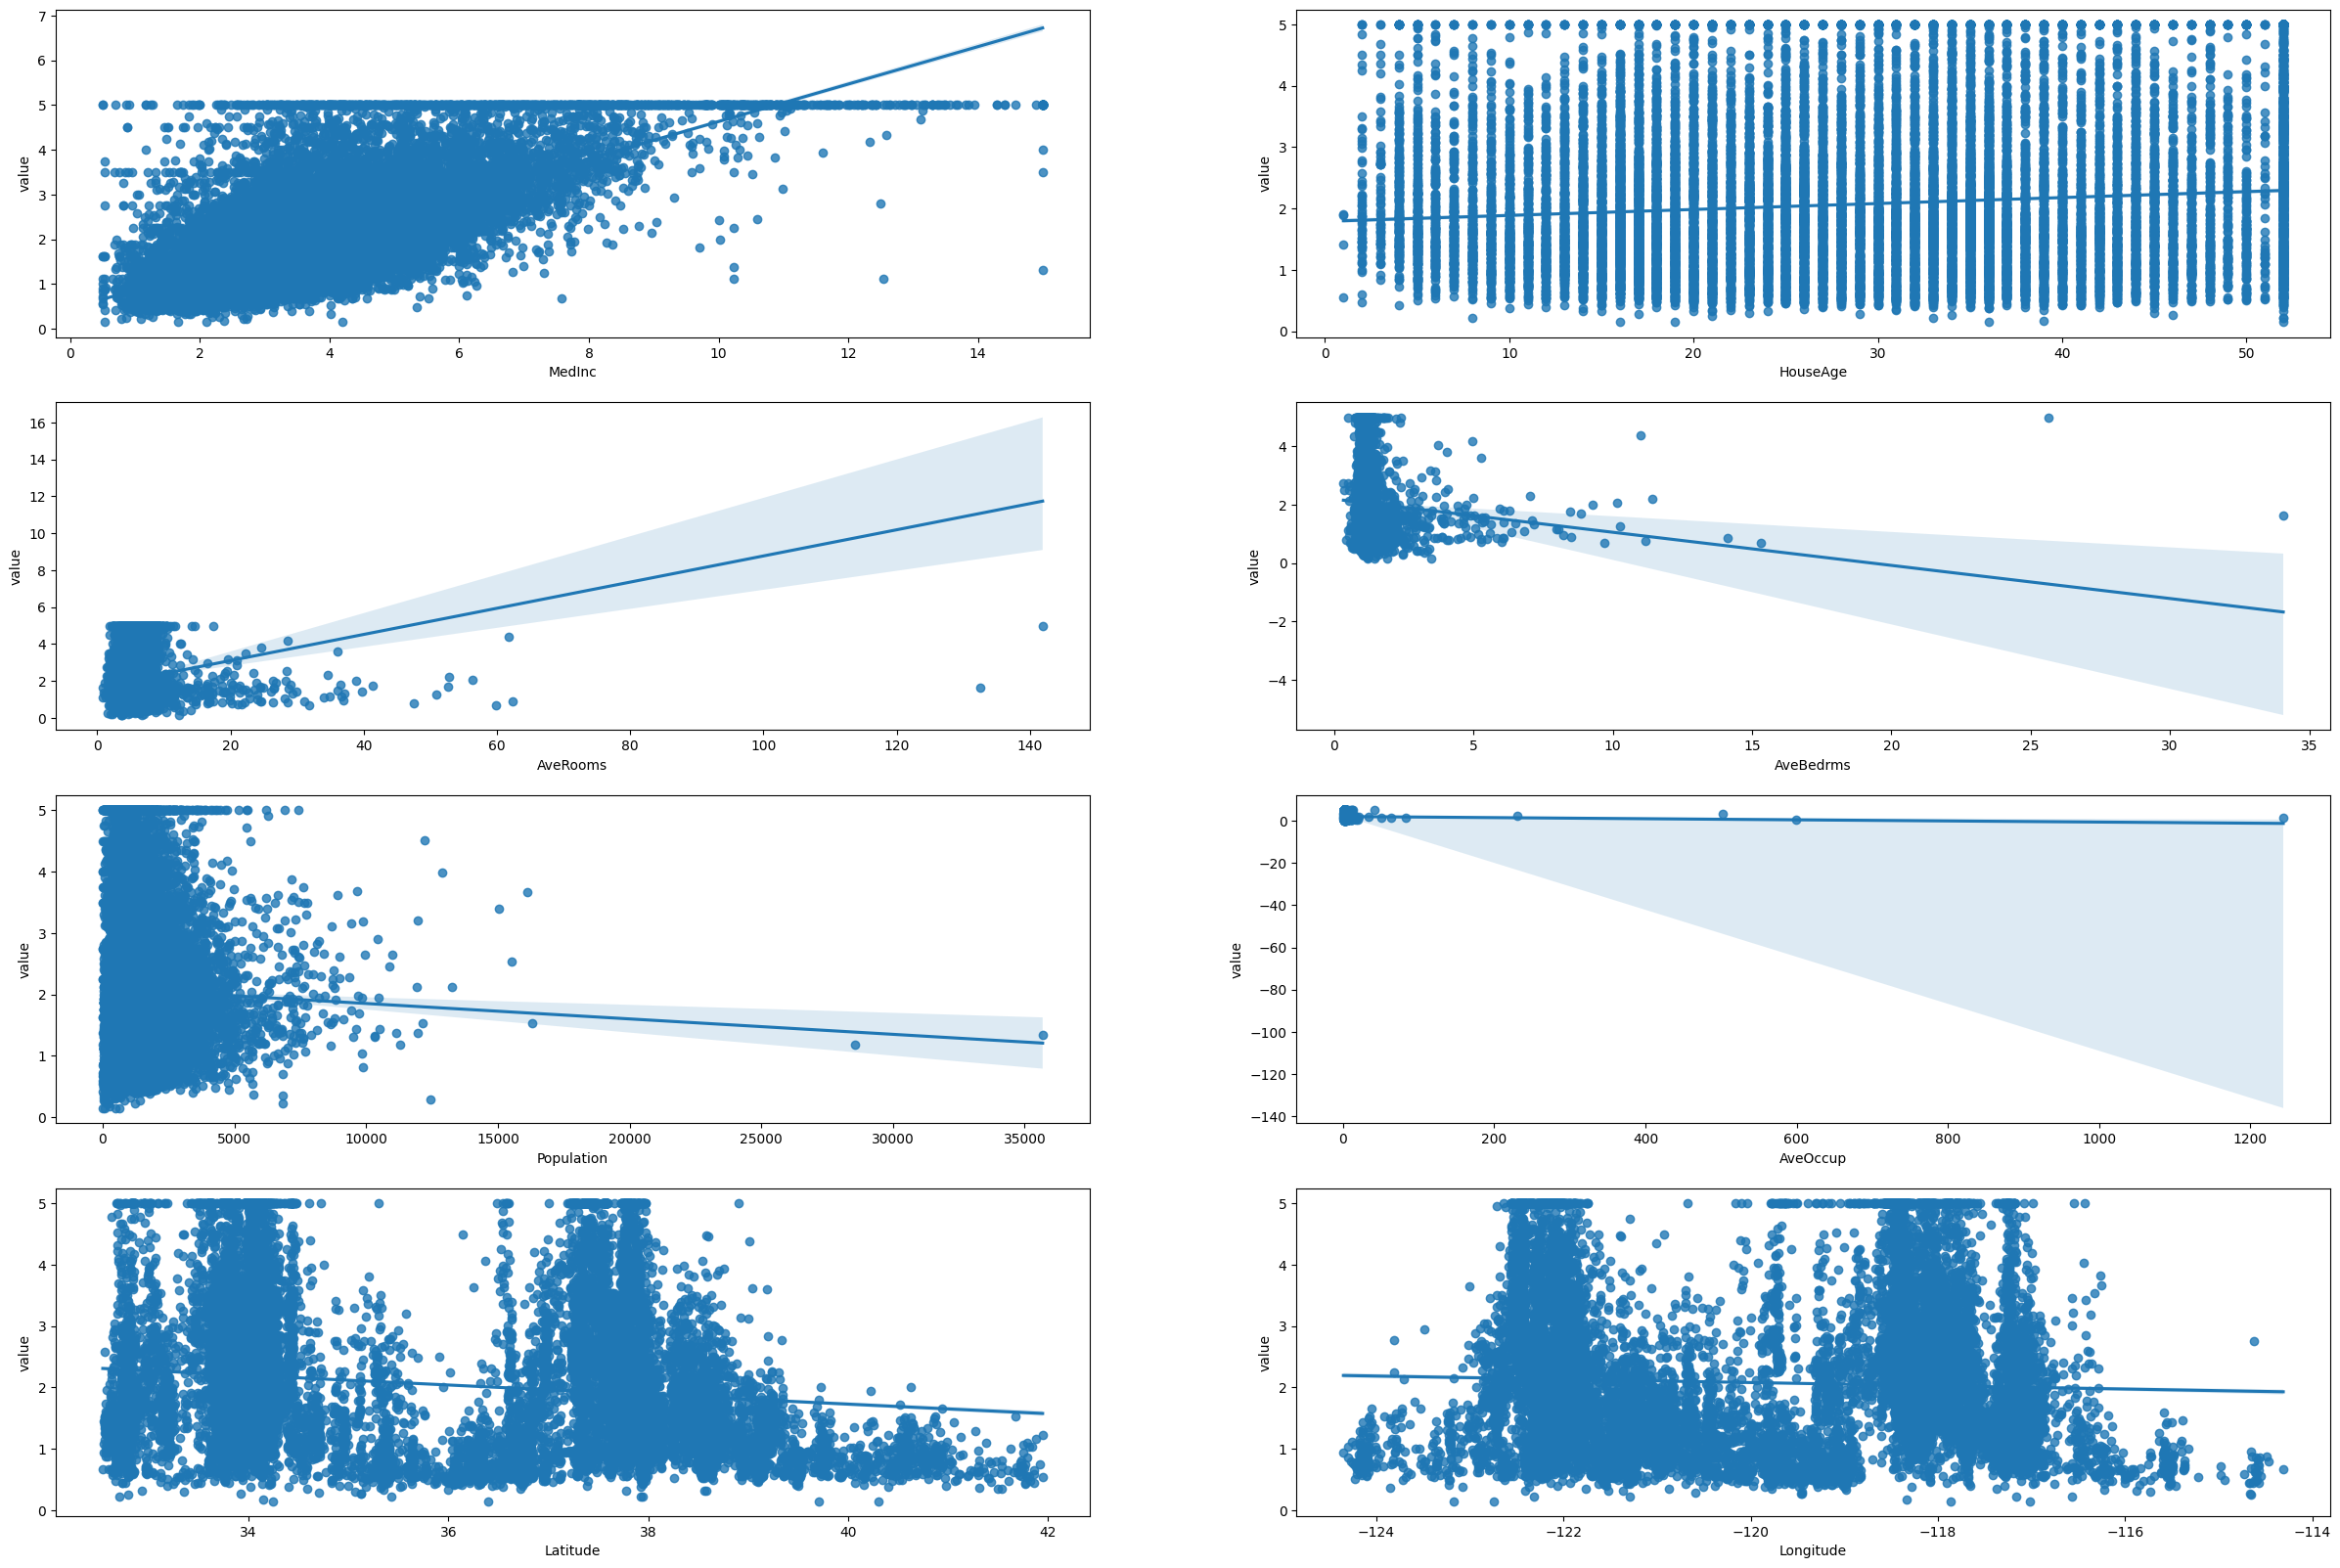

In [292]:
# 그래프 8개 생성 -> 독립변수의 개수
flag, axes = plt.subplots( nrows=4, ncols=2, figsize=(30, 20) )

# sns.regplot(x = df['MedInc'], y = df['value'], ax=axes[0][0], data=df)
# sns.regplot(x = df.iloc[:, 1], y = df['value'], ax=axes[0][1], data=df)

for i in range(len(df.columns)-1):
    sns.regplot(x=df.iloc[:, i], y=df['value'], ax=axes[i//2][i%2])
    # axis[][] -> [0][0], [0][1], [1][0], [1][1], [2][0], [2][1], [3][0], [3][1]
plt.show()

- 연습
	- df를 train과 test 8:2의 비율로 나눠준다
		- target 데이터는 value 컬럼의 데이터
		- random_state는 42
	- Max Abs Scaler를 이용해 데이터 스케일링

In [293]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [294]:
def sc_print(train_data, test_data):
    print(
        f'''
			x_train
				min : {train_data.min()}
				max = {train_data.max()}
				mean : {train_data.mean()}
				std : {train_data.std()}
			x_test
				min : {test_data.min()}
				max = {test_data.max()}
				mean : {test_data.mean()}
				std : {test_data.std()}
		'''
	)

In [295]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler

In [296]:
# 데이터 분할 -> 8:2
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('value', axis=1),
    df['value'],
    test_size=0.2,
    random_state=42
    # stratify=df['value'] # 데이터를 8:2(4:1)로 분할하려면 최소 5개가 필요한데 df['value']의 값이 5보다 작은 값이 있어서 에러 
)

In [297]:
df['value'].value_counts()

value
5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.52500      1
4.65000      1
4.57500      1
2.61200      1
3.07900      1
Name: count, Length: 3842, dtype: int64

In [298]:
# class 생성
MaScaler = MaxAbsScaler()
# 범위 지정
MaScaler.fit(x_train)

MaxAbsScaler()

In [299]:
x_train_sc = MaScaler.transform(x_train)
x_test_sc = MaScaler.transform(x_test)			# fit_transform과 transform 둘 다 사용 가능

sc_print(x_train_sc, x_test_sc)


			x_train
				min : -1.0
				max = 1.0
				mean : 0.10255256137080468
				std : 0.5020525267034452
			x_test
				min : -0.998713309207881
				max = 1.328841607565012
				mean : 0.1023445136959138
				std : 0.5017668372957783
		


In [300]:
# 모델 선택: 선형 회귀 모델
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [301]:
# 데이터 학습 -> 스케일링을 한 x_train, y_train
linear.fit(x_train_sc, y_train) 

LinearRegression()

In [302]:
# 예측 -> 스케일링이 된 x_test 데이터 입력
pred = linear.predict(x_test_sc)

In [303]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: value, Length: 4128, dtype: float64

In [304]:
pd.concat(
    [y_test.reset_index(drop=True), pd.Series(pred)],
    axis=1
)

,value,0
0,0.47700,0.719123
1,0.45800,1.764017
2,5.00001,2.709659
3,2.18600,2.838926
4,2.78000,2.604657
...,...,...
4123,2.63300,1.991746
4124,2.66800,2.249839
4125,5.00001,4.468770
4126,0.72300,1.187511


In [305]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, root_mean_squared_error		# MAE, MSE, 결졍계수(R-square), MSLE

In [306]:
# mean_absolute_error : 두개의 1차원 데이터의 차이를 구해 절댓값을 입히고 평균을 구해 반환
mae = mean_absolute_error(y_test, pred)
# mean_squared_error : 두개의 1차원 데이터의 차이를 구해 제곱한 뒤 평균을 구해 반환
mse = mean_squared_error(y_test, pred)
# root_mean_squared_error : mse에 루트씌운 값 반환
rmse = np.sqrt(mse)
rmse2 = root_mean_squared_error(y_test, pred)

# mean_squared_log_error : mse에 로그취한 값 반환
# msle = mean_squared_log_error(y_test, pred)

# y_test, pred 로그 변환
y_log = np.log1p(y_test)	# log(1+y_test)
pred_log = np.log1p(pred)	# log(1+pred)
msle = np.mean ((y_log-pred_log) ** 2)

# 결정계수 출력
r2 = r2_score(y_test, pred)


C:\Users\toqha\AppData\Local\Temp\ipykernel_6504\312869895.py:14: RuntimeWarning: invalid value encountered in log1p
  pred_log = np.log1p(pred)	# log(1+pred)


In [311]:
print(
    f'''
			MAE : {mae}
			MSE : {mse}
			RMSE : {rmse}
			RMSE2 : {rmse2}
			MSLE : {msle}
			R2SCORE : {r2}
    '''
)


			MAE : 0.533200130495656
			MSE : 0.555891598695244
			RMSE : 0.7455813830127761
			RMSE2 : 0.7455813830127761
			MSLE : 0.05413126584230592
			R2SCORE : 0.5757877060324511
    


In [308]:
# 스케일링 없이 학습&예측
linear2 = LinearRegression()
linear2.fit(x_train, y_train)

pred2 = linear2.predict(x_test)

In [309]:
# mean_absolute_error : 두개의 1차원 데이터의 차이를 구해 절댓값을 입히고 평균을 구해 반환
mae = mean_absolute_error(y_test, pred2)
# mean_squared_error : 두개의 1차원 데이터의 차이를 구해 제곱한 뒤 평균을 구해 반환
mse = mean_squared_error(y_test, pred2)
# root_mean_squared_error : mse에 루트씌운 값 반환
rmse = np.sqrt(mse)
rmse2 = root_mean_squared_error(y_test, pred2)

# mean_squared_log_error : mse에 로그취한 값 반환
# msle = mean_squared_log_error(y_test, pred)

# y_test, pred 로그 변환
y_log = np.log1p(y_test)	# log(1+y_test)
pred_log = np.log1p(pred2)	# log(1+pred)
msle = np.mean ((y_log-pred_log) ** 2)

# 결정계수 출력
r2 = r2_score(y_test, pred2)


C:\Users\toqha\AppData\Local\Temp\ipykernel_6504\3064793672.py:14: RuntimeWarning: invalid value encountered in log1p
  pred_log = np.log1p(pred2)	# log(1+pred)


In [312]:
print(
    f'''
			MAE : {mae}
			MSE : {mse}
			RMSE : {rmse}
			RMSE2 : {rmse2}
			MSLE : {msle}
			R2SCORE : {r2}
    '''
)


			MAE : 0.533200130495656
			MSE : 0.555891598695244
			RMSE : 0.7455813830127761
			RMSE2 : 0.7455813830127761
			MSLE : 0.05413126584230592
			R2SCORE : 0.5757877060324511
    
